#### Observations
* 

In [1]:
#dependencies
import os
import requests
import json
import pandas as pd
import random
import numpy as np
from citipy import citipy
import gmaps
import matplotlib.pyplot as plt
from config import w_api

## Generate Cities List

In [2]:
# cities list
cities=[]
# latitude and longitude list
loc=[]

# crate random latitude and longitude locations
lat = np.random.uniform(low=-90,high=90.,size=1500)
lng= np.random.uniform(low=-180,high=180.,size=1500)

# combine them into a list
locs= zip(lat,lng)

# print(tuple(loc))


In [3]:
# pick cities closest to random locations
for loc in locs:
    city = citipy.nearest_city(loc[0],loc[1]).city_name
    
    # check if city is in list, if not, add it.
    if city not in cities:
        cities.append(city)

# confirm number of cities
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# create url for requests
units="units=imperial"
api= f"&APPID={w_api}"
url = f"https://api.openweathermap.org/data/2.5/weather?{units}{api}"

# create list for data retreived from openweathermap
city_data =[]


# show data retrieval
print("Beginning Data Retrieval \n"     
    "-----------------------------")
set_count =1
record_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # try statement to skip cties that don't exist in data
    try:
        city_weather = requests.get(city_url).json()
        
    # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # add info to list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
print("Data retrieval is complete.")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | grand forks
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | qalyub
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | maumere
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | mazagao
Processing Record 16 of Set 1 | santa maria
Processing Record 17 of Set 1 | pangnirtung
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | arys
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | hovd
Processing Record 22 of Set 1 | lulea
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:

# create data frame from requests
city_data_df= pd.DataFrame(city_data)



# Exports DataFrame as a csv file
city_data_df.to_csv("../output_data/city_data_df.csv",
                    encoding="utf-8", header=True)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,48.09,77,65,11.01,AR,1655194151
1,vaini,-21.2000,-175.2000,71.76,94,20,3.44,TO,1655194377
2,praia da vitoria,38.7333,-27.0667,60.76,86,100,3.29,PT,1655194378
3,atuona,-9.8000,-139.0333,76.62,79,57,19.55,PF,1655194379
4,hithadhoo,-0.6000,73.0833,83.75,69,62,6.55,MV,1655194381
5,punta arenas,-53.1500,-70.9167,33.91,93,0,8.05,CL,1655194382
6,grand forks,47.9417,-97.4337,71.33,94,75,14.97,US,1655194088
7,qalyub,30.1792,31.2056,84.99,42,0,7.78,EG,1655194385
8,kapaa,22.0752,-159.3190,75.18,86,20,16.11,US,1655194387
9,maumere,-8.6199,122.2111,82.96,68,61,6.33,ID,1655194388


In [6]:
# describe Humidty for count check and max value
city_data_df["Humidity"].describe()

count    573.000000
mean      66.034904
std       23.537030
min        1.000000
25%       49.000000
50%       71.000000
75%       85.000000
max      100.000000
Name: Humidity, dtype: float64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#no cities over 100% humidity

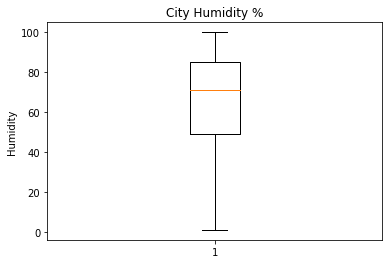

573

In [8]:
# Visual check of data for outliers
humidity_df = pd.read_csv("../output_data/city_data_df.csv")
humidity =humidity_df["Humidity"]

fig1, ax1 = plt.subplots()
ax1.set_title('City Humidity %')
ax1.set_ylabel("Humidity")
ax1.boxplot(humidity)
plt.show()
# count of values for comparision in next step
len(humidity_df)


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(humidity_df["Humidity"], inplace=False)

# count of values for comparision
len (clean_city_data)



478

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

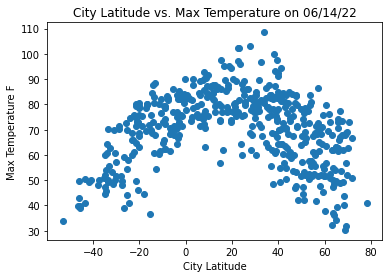

In [10]:
# Plot of Lat vs Max Temp
# import of time dependecie dates can be added to plots
import time

# Creation of scatter plot lat vs temp
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Max Temperature on "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature F')
plt.show()

## Latitude vs. Humidity Plot

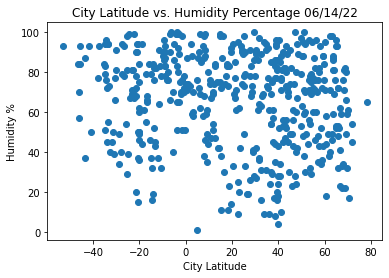

In [11]:
# Creation of scatter plot  lat vs humidity
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity Percentage "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.show()

## Latitude vs. Cloudiness Plot

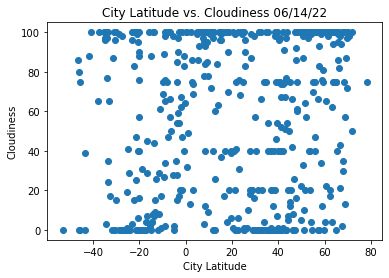

In [12]:
# Creation of scatter plot lat vs cloudiness
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

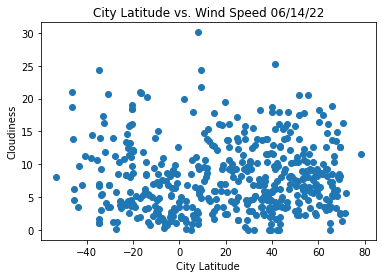

In [13]:
# Creation of scatter plot lat vs wind speed
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Linear Regression

In [14]:
# Create Northen and Southern Hemisphere DataFrames.
north_hemi_df = clean_city_data.loc[(city_data_df["Lat"] >= 0)]
south_hemi_df = clean_city_data.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6181003924279647


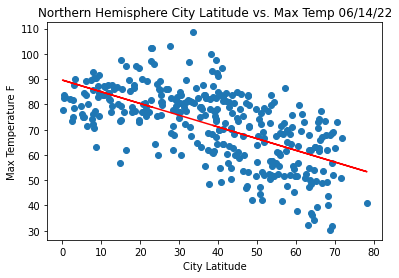

In [15]:
# import Lingress
from scipy.stats import linregress

# create scater plot with lat vs max temp plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,275),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature F')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7109047348268182


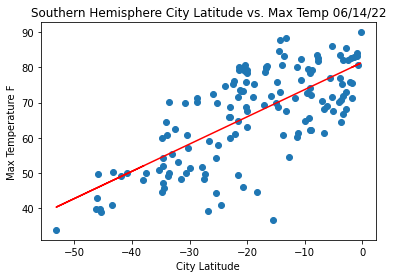

In [16]:
# create scater plot with lat vs max temp plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,275),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Max Temp "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature F')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.08058250547788476


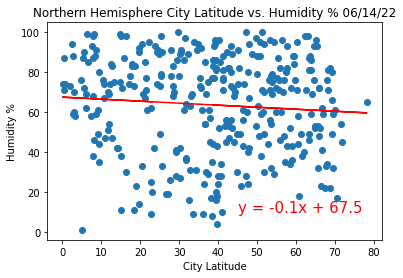

In [17]:
# create scater plot with lat vs humidity plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07479482894072477


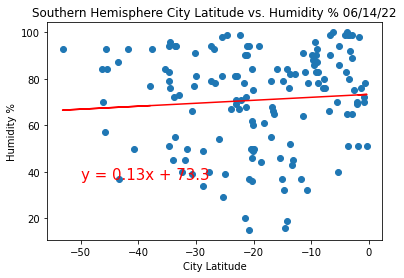

In [18]:
# create scater plot with lat vs humidity plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,37),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Humidity % "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02774631858585434


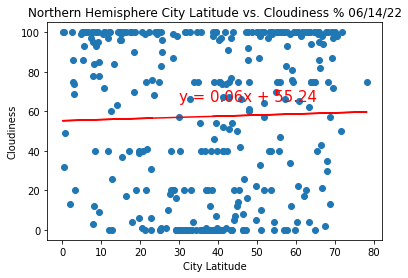

In [19]:
# create scater plot with lat vs Cloudiness plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,65),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness % "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.007833407877238303


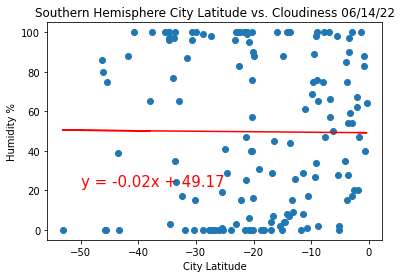

In [20]:
# create scater plot with lat vs Cloudiness plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.033455713816398065


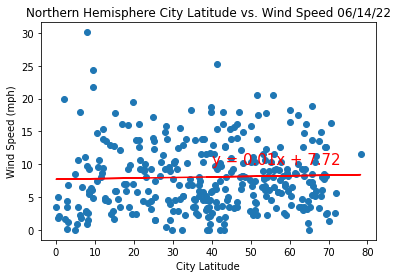

In [21]:
# create scater plot with lat vs Wind Speed plus linear regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25526798305547066


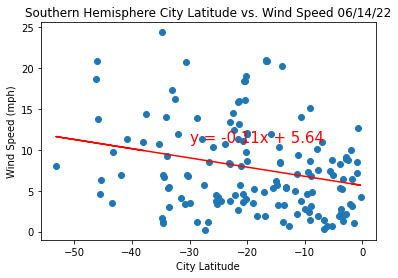

In [22]:
# create scater plot with lat vs Wind Speed plus linear regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']

# linear regression calc and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,11),fontsize=15,color="red")

# Labeling and r value
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()